In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
DT=pd.read_csv("C:\ExcelR\Salary_data.csv") #import file

In [3]:
DT.shape

(30, 2)

In [4]:
DT.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
DT.drop_duplicates()      #drop duplicate values
DT[DT.duplicated()]      #to check the droped row, in this case none

,YearsExperience,Salary


In [6]:
DT1=DT.rename({'YearsExperience':'YExp','Salary':'Sal'},axis=1)

In [7]:
DT=DT1


In [8]:
DT

,YExp,Sal
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [9]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YExp    30 non-null     float64
 1   Sal     30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


# Perform Linear Regression¶

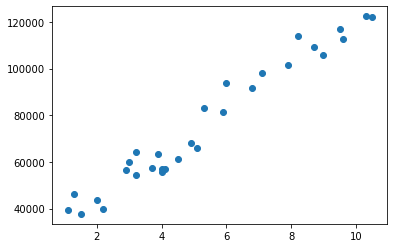

In [10]:
plt.scatter(DT.YExp,DT.Sal)


In [11]:
DT.corr()

,YExp,Sal
YExp,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:xlabel='YExp', ylabel='Sal'>

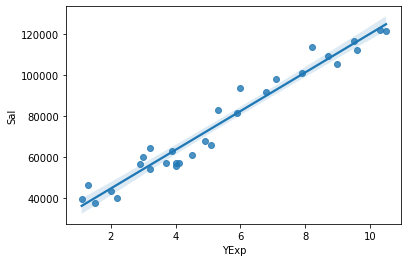

In [12]:
sns.regplot(x='YExp',y='Sal',data=DT)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YExp', ylabel='Density'>

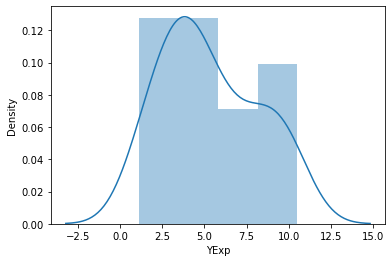

In [13]:
sns.distplot(DT['YExp'])                 #ploting distribution plot for stime column 

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sal', ylabel='Density'>

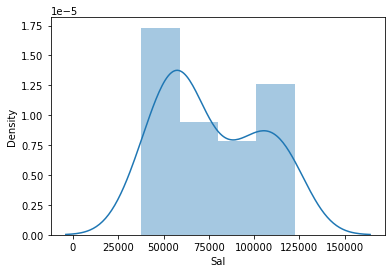

In [14]:
sns.distplot(DT['Sal'])                 #ploting distribution plot for stime column 

In [15]:
import statsmodels.formula.api as smf
model=smf.ols("Sal~YExp",data=DT).fit()                #assign X and Y and build a model

In [16]:
model.params

Intercept    25792.200199
YExp          9449.962321
dtype: float64

In [17]:
(model.rsquared,model.rsquared_adj)                       #find the rsquared and rsquared adjusted values

(0.9569566641435086, 0.9554194021486339)

In [18]:
new_data=pd.Series([1.1,2])

In [19]:
prdct=pd.DataFrame(new_data,columns=['YExp'])

In [20]:
model.predict(prdct)

0    36187.158752
1    44692.124842
dtype: float64

In [21]:
DT_1=DT
DT_1['YExp']=np.log(DT_1.YExp)

In [22]:
model1=smf.ols("Sal~YExp",data=DT_1).fit()

In [23]:
model1.params

Intercept    14927.97177
YExp         40581.98796
dtype: float64

In [24]:
model1.rsquared,model.rsquared_adj


(0.8538888828756969, 0.9554194021486339)

In [25]:
new_data1=pd.Series([1.1,2])
prdct1=pd.DataFrame(new_data1,columns=['YExp'])
model1.predict(prdct1)

0    59568.158526
1    96091.947690
dtype: float64